
[1.0 Data loading](#1)<br>

[2.0 Data preprocessing](#2)<br>
    &emsp; [2.1 Overview](#21)<br>
    &emsp; [2.2 Encoding categorical data](#21)<br>

[3.0 Data visualization](#3)<br>
    &emsp; [3.1 Distribution diagrams](#31)<br>
    &emsp; [3.2 Skewness of classes checking](#32)<br>


[4.0 Feature engineering](#4)<br>
    &emsp; [4.1 Analysys](#41)<br>
    &emsp; [4.2 Reducing data](#42)<br>
    &emsp; [4.3 Normalization](#43)<br>
    &emsp; [4.4 Splitting data](#44)<br>
    &emsp; [4.5 Over-sampling data](#44)<br>

[5.0 Model applying](#5)<br>
    &emsp;  [5.1 KNN](#51)<br>
    &emsp;  [5.2 DT](#52)<br>
    &emsp;  [5.3 SVMs & tuning](#53)<br>
    &emsp;  [5.4 RF](#54)<br>
    &emsp;  [5.5 AdaBoost](#55)<br>
    &emsp;  [5.6 FNN](#56)<br>
  
[6.0 Summarazing results](#6)<br>

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix

import seaborn as sns
%matplotlib inline
plt.style.use('bmh')



### 1.0 Data loading
<a id='1'></a>

We use pandas dataframe as data container. Each row is the one data sample.

Dataset from:
https://www.kaggle.com/datasets/muratkokludataset/dry-bean-dataset

***Features Information:***

1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.

2.) Perimeter (P): Bean circumference is defined as the length of its border.

3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.

4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.

5.) Aspect ratio (K): Defines the relationship between L and l.

6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.

7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.

8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.

9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.

10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.

11.)Roundness (R): Calculated with the following formula: (4piA)/(P^2)

12.)Compactness (CO): Measures the roundness of an object: Ed/L

13.)ShapeFactor1 (SF1)

14.)ShapeFactor2 (SF2)

15.)ShapeFactor3 (SF3)

16.)ShapeFactor4 (SF4)

***Target:***

17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)


In [2]:
# load datasets
df_data = pd.read_excel('Dry_Bean_Dataset.xlsx')

# check loaded data
df_data.head()



Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [3]:
# check data shape
print(df_data.shape)


(13611, 17)


### 2.0 Data preprocessing
<a id='2'></a>
Before performing any operations with data and model applying, it is necessary to be assured about absence of missing values and statistical parameters.

#### 2.1 Overview
<a id='21'></a>

Firsty, let's check base statistical paramenters for data and look for nan values

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [5]:
# get stat for all Xi
df_data.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

Different scale of features could be harmfull for model fitting, so before model applying data normalization will be used.

In [6]:
# returns sorted DF with nan percentage for each feature
def count_nan(df):
    n = df.shape[0] # get sample size
    series = df.isna().sum(axis=0) / n # calculate nan rate
    df = pd.DataFrame({"Feature":series.index, "Missing values, %":np.round(series.values*100, 2)}) # create df with missing percentage
    return df.sort_values(by="Missing values, %", ascending=False) # sort and return

In [7]:
count_nan(df_data)

Feature  Missing values, %
0              Area                0.0
9          Solidity                0.0
15     ShapeFactor4                0.0
14     ShapeFactor3                0.0
13     ShapeFactor2                0.0
12     ShapeFactor1                0.0
11      Compactness                0.0
10        roundness                0.0
8            Extent                0.0
1         Perimeter                0.0
7     EquivDiameter                0.0
6        ConvexArea                0.0
5      Eccentricity                0.0
4      AspectRation                0.0
3   MinorAxisLength                0.0
2   MajorAxisLength                0.0
16            Class                0.0

Fortunately, no missing values founded. 

#### 2.2 Encoding categorical data
<a id='22'></a>

Since only target variable don't have numeric type, only target will be encoded by number for better usability.

In [8]:
target = 'Class'
# get classes labels
labels = df_data[target].unique()
# create dictionaries for convenient encoding/decoding
class_decoder = dict([(n,l) for n,l in enumerate(labels)])
class_encoder = dict([(l,n) for n,l in enumerate(labels)])

class_decoder

{0: 'SEKER',
 1: 'BARBUNYA',
 2: 'BOMBAY',
 3: 'CALI',
 4: 'HOROZ',
 5: 'SIRA',
 6: 'DERMASON'}

In [9]:
# encode labels with nums
df_data[target] = df_data[target].apply(lambda x: class_encoder[x])

### 3.0 Data visualization
<a id='3'></a>


#### 3.1 Distribution diagrams
<a id='31'></a>

Histograms will show the difference (if such one exists) in data distribution for classes. So, let's plot histograms for all features in respect to classes. (There are 7 classes).

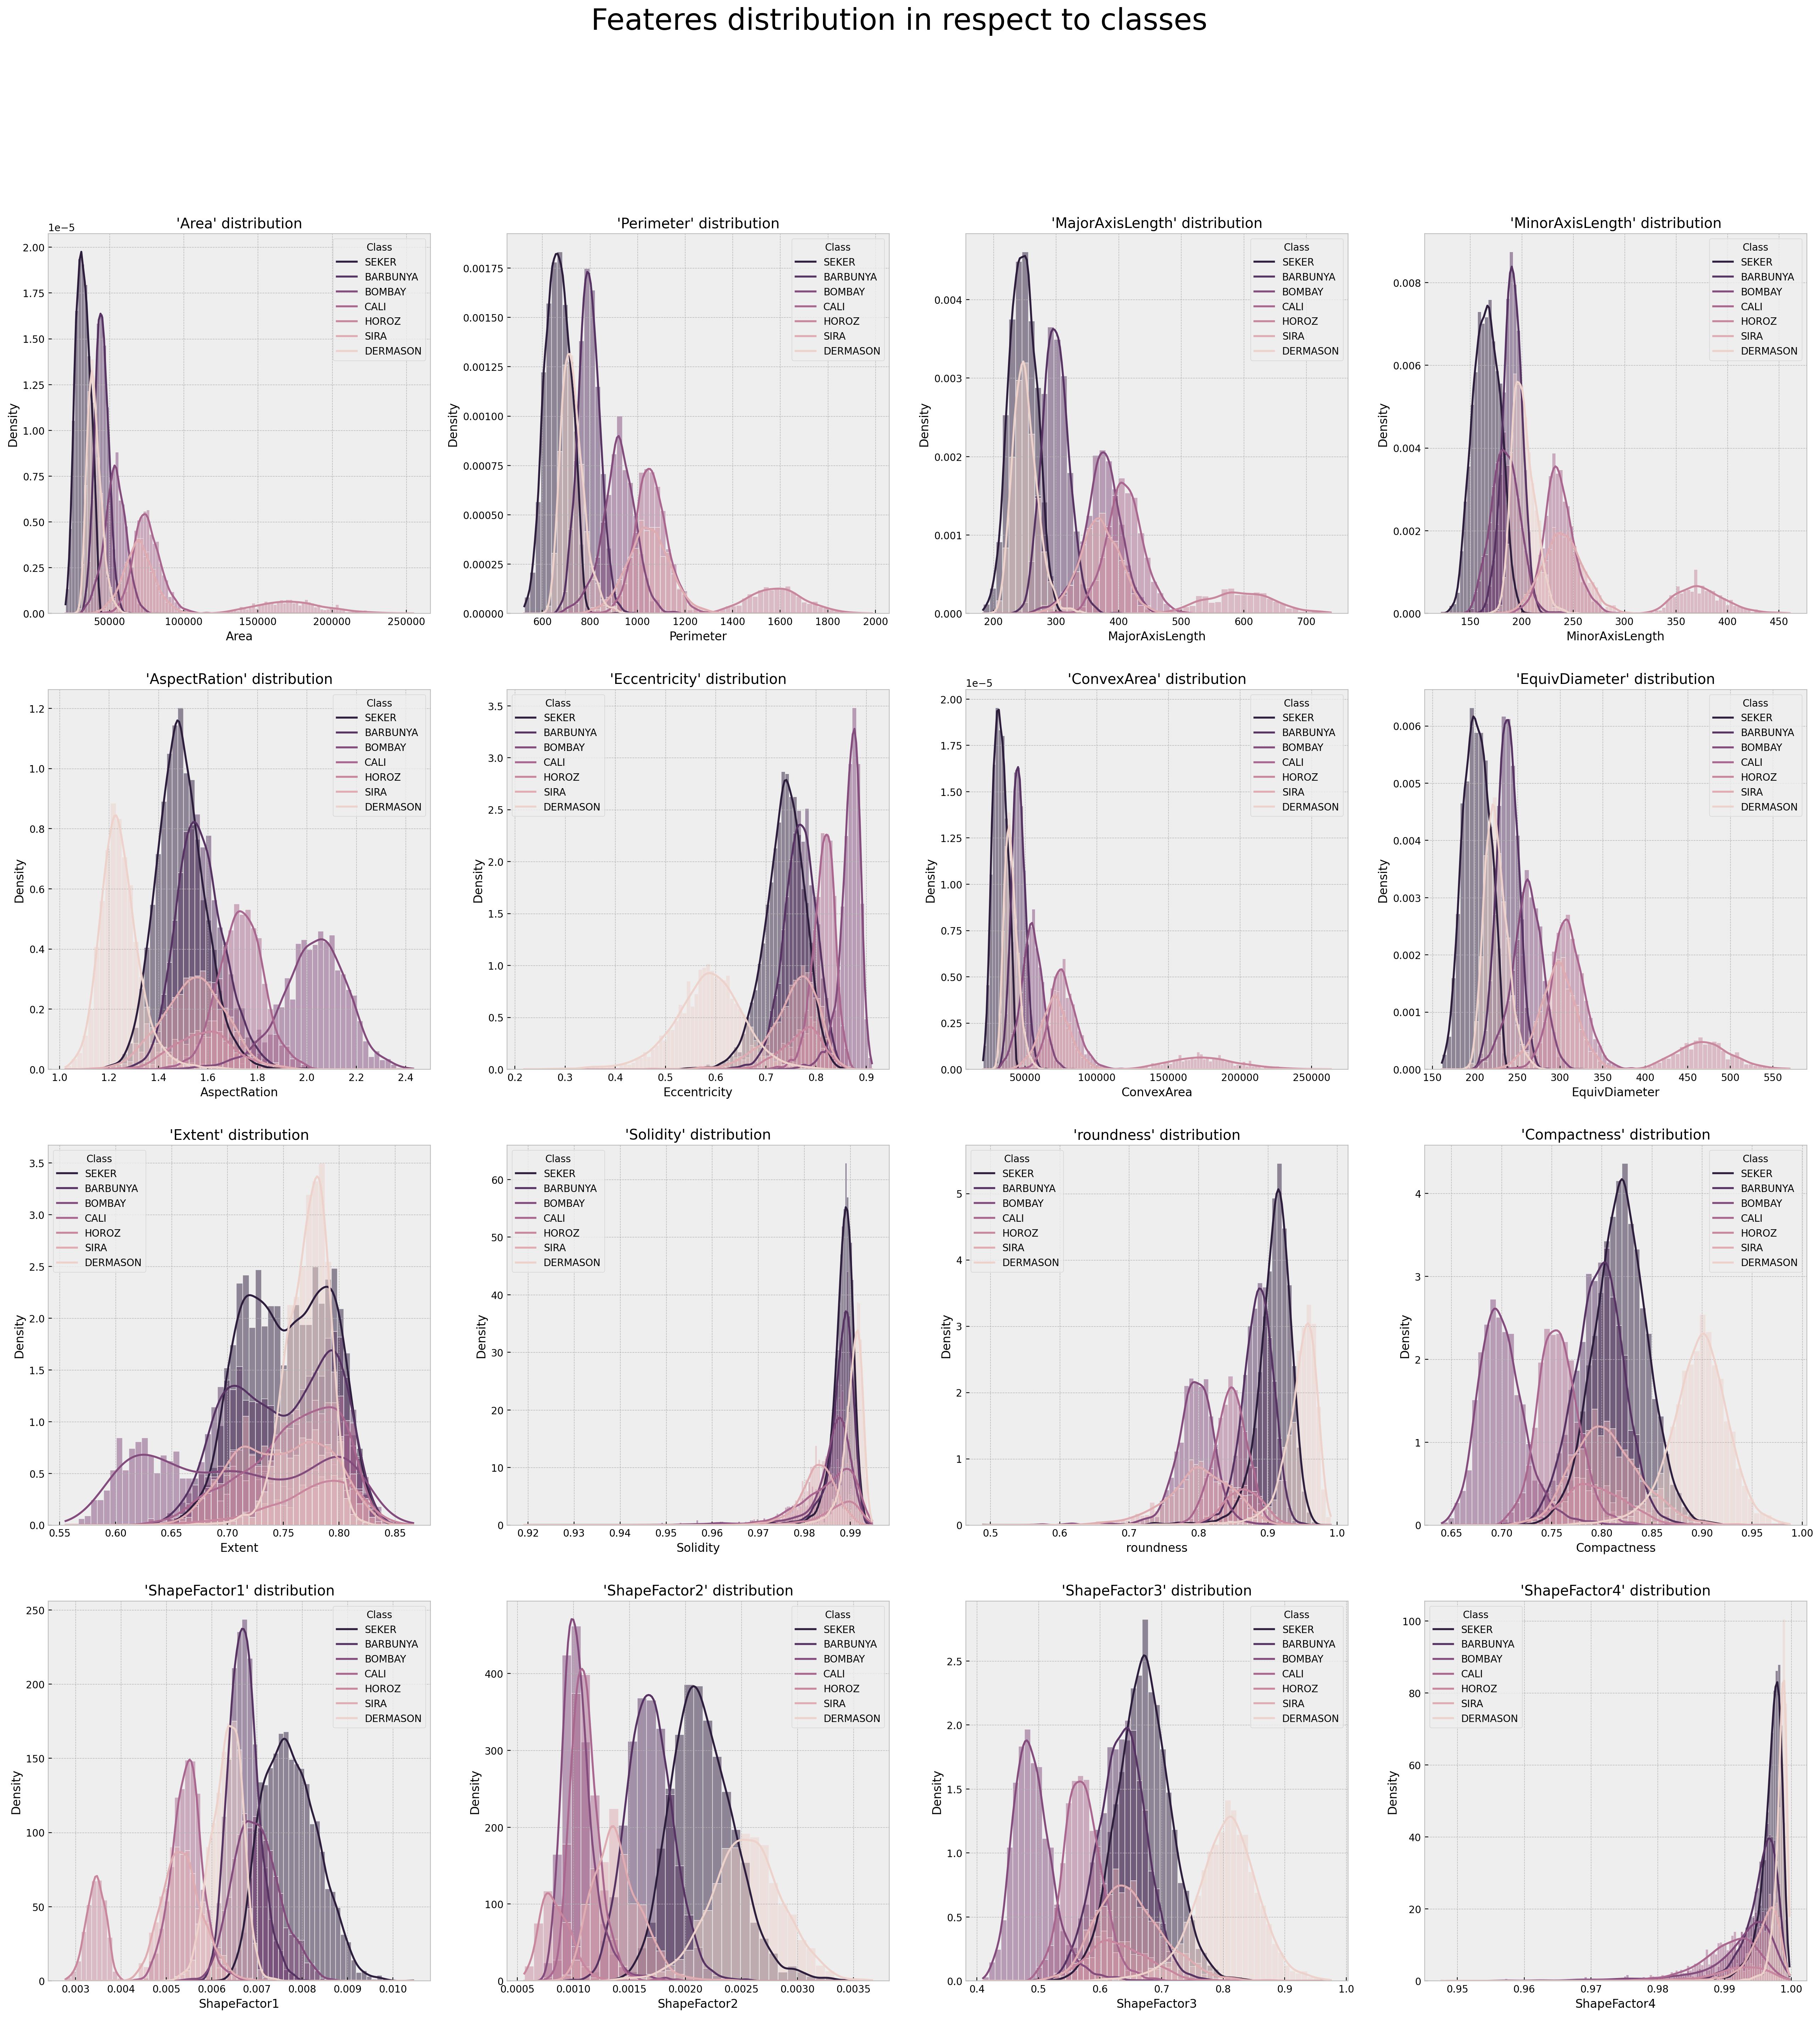

In [10]:
# plotting routine
plots_in_row = 4
fig, ax = plt.subplots(4,plots_in_row, figsize=(32,32), dpi=200)

# count of samples to plot (-1 means all dataset)
samples_count = -1

# plot hist for all features
for k in range(16):
    # coordinates of plot
    i = k // plots_in_row
    j = k % plots_in_row
    
    # plot hist
    sns.histplot(data=df_data.iloc[0:samples_count, :], stat='density', 
                 kde=True, ax=ax[i,j], x = df_data.columns[k], hue_order = class_decoder.keys(), hue=target)
    # adding some extra infromation to plot
    ax[i,j].set_ylabel('Density')
    ax[i,j].set_xlabel(df_data.columns[k])
    ax[i,j].set_title("'{}' distribution".format(df_data.columns[k]))
    ax[i,j].legend(class_encoder, title='Class') 


# setting plot design and show
plt.suptitle("Feateres distribution in respect to classes", fontsize=30)
plt.rcParams.update({'font.size': 12})
plt.show()

Histogramms shows significantly distinguishable distributions for all 7 classes almost for all features. 

#### 3.2 Skewness of classes checking
<a id='32'></a>

To build correct classifier skewness of classes is very important parameter. In future such information will help to control precision and recall errors

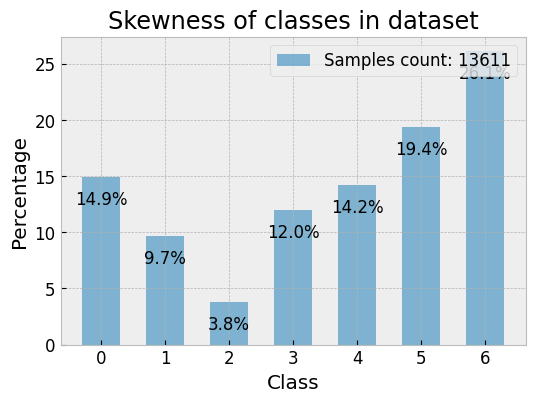

In [11]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
plt.style.use('bmh')

# count samples for each class
d = df_data[target].value_counts()

# plot in bars view
plt.bar(d.keys(), np.round(100*d / sum(d), 1), alpha=0.6,width=0.6, label="Samples count: "+str(sum(d)))

# add percentage text
for i, j in zip(d.keys(), np.round(100*d / sum(d), 1)):
    ax.text(i,j-2, str(j) + '%',
                       ha="center", va="center", color="k")

# some design
plt.ylabel('Percentage')
plt.xlabel('Class')
plt.legend(loc='upper right')
plt.title("Skewness of classes in dataset")
plt.rcParams.update({'font.size': 8})

# SAVE AND SHOW
plt.show()

So, classes are skewed enough, it should be considered while learning model

### 4.0 Feature engineering
<a id='4'></a>

In spite of small features count and dependency between target and features observed with naked eye (thanks to distribution plots), some correlation analysys should be made anyway. It is expected to reduce some unimportant features.

#### 4.1 Analysys
Since features are numeric while target is categorical, F-value estimation is good choise to determine relation between features and target. 

In [12]:
from sklearn.feature_selection import f_classif, mutual_info_classif
import tqdm

In [13]:
# extract data
columns_x = df_data.columns[0:-1]
x_, y_ = df_data[columns_x], df_data[target]

flist = []
plist = []
for col in tqdm.tqdm(columns_x):
    # extract feature and get estimation
    fstat, pvalue = f_classif(np.array(x_[col].copy()).reshape(-1, 1), y_)
    # append to lists
    flist.append(fstat[0])
    plist.append(pvalue[0])


    
df_description = pd.DataFrame({"Feature":columns_x, "f score":flist, 'p-value':plist})
df_description.sort_values(by='f score', ascending=False)

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 636.63it/s]


Feature       f score  p-value
0              Area  29017.510462      0.0
6        ConvexArea  28961.791217      0.0
7     EquivDiameter  25444.547794      0.0
1         Perimeter  24283.663708      0.0
3   MinorAxisLength  22442.386382      0.0
2   MajorAxisLength  21622.237936      0.0
13     ShapeFactor2  12329.883853      0.0
12     ShapeFactor1  12081.321127      0.0
4      AspectRation  10376.979153      0.0
11      Compactness  10166.117904      0.0
14     ShapeFactor3   9900.437839      0.0
5      Eccentricity   8276.744014      0.0
10        roundness   6156.430313      0.0
15     ShapeFactor4   1255.105300      0.0
9          Solidity    631.724470      0.0
8            Extent    422.302320      0.0

It seems, that all features are informative enough for making prediction, so no data reducing will be performed


#### (( 4.2 Reducing data ))
<a id='42'></a>

(( Drop features with the similariest distributions means )) NOT USED

In [61]:
df_data_redc = df_data.drop(columns=['Solidity', 'Extent', 'ShapeFactor4'])

####    4.3 Normalization
<a id='43'></a>


In [14]:
# copy obj
df_data_norm = df_data.copy()
# normalize by columns
df_data_norm = (df_data_norm - df_data_norm.min(axis=0)) / (df_data_norm.max(axis=0) - df_data_norm.min(axis=0))
# target column should be unchanged
df_data_norm[target] = df_data[target]
# check results:
df_data_norm.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count  13611.000000  13611.000000     13611.000000     13611.000000   
mean       0.139320      0.226304         0.245905         0.236190   
std        0.125212      0.146710         0.154332         0.133171   
min        0.000000      0.000000         0.000000         0.000000   
25%        0.067926      0.122404         0.125531         0.157944   
50%        0.103469      0.184992         0.204017         0.207054   
75%        0.174691      0.309781         0.347394         0.279902   
max        1.000000      1.000000         1.000000         1.000000   

       AspectRation  Eccentricity    ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000  13611.000000   13611.000000  13611.000000   
mean       0.397295      0.768181      0.136386       0.224978      0.625380   
std        0.175517      0.132860      0.122744       0.144996      0.157895   
min        0.000000      0.000000      0.000000       0.000000      0.000000   
25%        0.289902      0.717685      0.066084       0.131880      0.525344   
50%        0.374443      0.787743      0.100974       0.189141      0.657953   
75%        0.485429      0.854208      0.171533       0.289620      0.744779   
max        1.000000      1.000000      1.000000       1.000000      1.000000   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.900112      0.765693      0.459403      0.493356      0.371445   
std        0.061783      0.118786      0.177989      0.147006      0.192168   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.880592      0.683497      0.351551      0.406861      0.190064   
50%        0.915228      0.785402      0.463478      0.503986      0.364216   
75%        0.938164      0.852681      0.558634      0.585601      0.517962   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ShapeFactor3  ShapeFactor4         Class  
count  13611.000000  13611.000000  13611.000000  
mean       0.413253      0.910285      3.631181  
std        0.175392      0.083898      2.151782  
min        0.000000      0.000000      0.000000  
25%        0.302997      0.884146      2.000000  
50%        0.410514      0.935698      4.000000  
75%        0.506118      0.964454      6.000000  
max        1.000000      1.000000      6.000000

#### 4.4 Splitting data 
<a id='44'></a>


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# split data, shuffle before, use same proportion of classes, as was in full dataset
df_train, df_test = train_test_split(df_data_norm, test_size=0.3, shuffle=True, stratify=df_data[target])

In [17]:
# for more convenience, split by features and target
df_trainX, df_trainY = df_train.drop(columns=target), df_train[target]
df_testX, df_testY = df_test.drop(columns=target), df_test[target]

#### 4.5 Over-sampling data
<a id='45'></a>


In [18]:
from imblearn.over_sampling import RandomOverSampler

# create oversampler
ROS = RandomOverSampler(random_state=42)

# apply to data
df_trainX_os, df_trainY_os  = ROS.fit_resample(df_trainX, df_trainY)

print('Original dataset shape', df_trainY.value_counts())
print('Resample dataset shape', df_trainY_os.value_counts())

Original dataset shape Class
6    2482
5    1845
0    1419
4    1350
3    1141
1     925
2     365
Name: count, dtype: int64
Resample dataset shape Class
5    2482
2    2482
4    2482
6    2482
0    2482
3    2482
1    2482
Name: count, dtype: int64


### 5.0 Model applying
<a id='5'></a>
#### 5.1 KNN
<a id='51'></a>


In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# create model with optimal parameters
clf1 = KNeighborsClassifier(n_neighbors=5,
                            weights='uniform', #uniform
                            algorithm='auto',
                            leaf_size=30,
                            p=2,
                            metric='minkowski',
                            n_jobs=-1)

#fit
clf1.fit(df_trainX.to_numpy(), df_trainY.to_numpy())


KNeighborsClassifier(n_jobs=-1)

###### After some tests, best results was achieved with:
* weighted neighbours by their inversed distance
* Manhattan  metric provides the same result, but more computational efficient
* 5 neighbours threshhold

Check score:

In [23]:
# get accuracy for test and train datasets
st = clf1.score(df_trainX.to_numpy(), df_trainY.to_numpy())
sv = clf1.score(df_testX.to_numpy(), df_testY.to_numpy())
print('Score for train dataset: ', round(100*st, 2), '%', sep='')
print('Score for test dataset: ', round(100*sv, 2), '%', sep='')

# print per class accuracy, using custom function
per_class_accuracy(df_testY, clf1.predict(df_testX.to_numpy()))

Score for train dataset: 93.89%
Score for test dataset: 92.19%
Class 0 accuracy: 96.22%
Class 1 accuracy: 90.43%
Class 2 accuracy: 100.0%
Class 3 accuracy: 94.68%
Class 4 accuracy: 94.46%
Class 5 accuracy: 86.09%
Class 6 accuracy: 91.54%
Overall: 93.35%


[96.217, 90.428, 100.0, 94.683, 94.464, 86.094, 91.541]

Plot confusion matrix:

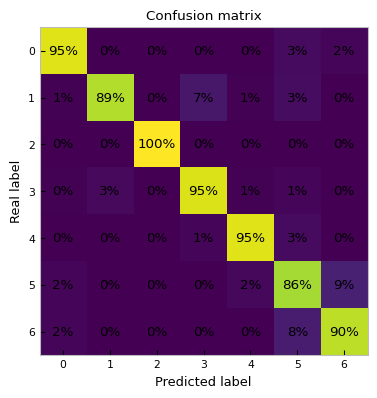

Class 0 accuracy: 95.07%
Class 1 accuracy: 88.66%
Class 2 accuracy: 100.0%
Class 3 accuracy: 94.89%
Class 4 accuracy: 95.16%
Class 5 accuracy: 86.47%
Class 6 accuracy: 90.23%
Overall: 92.92%


[95.066, 88.665, 100.0, 94.888, 95.156, 86.473, 90.226]

In [71]:
# plot confusion table, using custom function
plot_confusion_matrix(df_testY.to_numpy(), clf1.predict(df_testX.to_numpy()), imsize=4.4)  

#### 5.2 Decision trees

<a id='52'></a>


In [73]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [77]:
dfClf = DecisionTreeClassifier(criterion='gini')
dfClf.fit(df_trainX, df_trainY)


DecisionTreeClassifier()

Score for train dataset: 100.0%
Score for test dataset: 89.3%


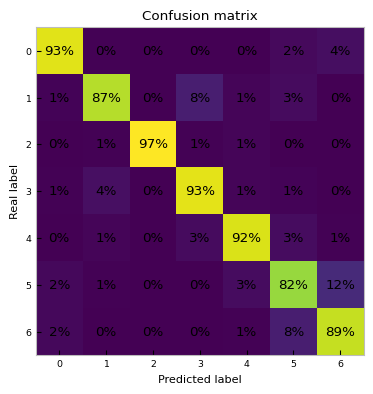

Class 0 accuracy: 93.26%
Class 1 accuracy: 86.65%
Class 2 accuracy: 97.45%
Class 3 accuracy: 93.46%
Class 4 accuracy: 91.87%
Class 5 accuracy: 82.3%
Class 6 accuracy: 88.72%
Overall: 90.53%


[93.257, 86.65, 97.452, 93.456, 91.869, 82.301, 88.722]

In [83]:
# get accuracy for test and train datasets
st = dfClf.score(df_trainX, df_trainY)
sv = dfClf.score(df_testX, df_testY)
print('Score for train dataset: ', round(100*st, 2), '%', sep='')
print('Score for test dataset: ', round(100*sv, 2), '%', sep='')

plot_confusion_matrix(df_testY, dfClf.predict(df_testX), imsize=4.4)  

#### 5.3 SVM

<a id='53'></a>


In [86]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [87]:
hyperparams_grid = {'C': [0.1, 1, 10, 100, 500], 'gamma': [10, 1, 0.1,0.01,0.001], 'kernel': ['rbf']}  # nonlinear kernel


In [91]:
tuned_svm = GridSearchCV(SVC(), hyperparams_grid, refit=True)

tuned_svm.fit(df_trainX,df_trainY)


print("best params:", tuned_svm.best_params_)

best_svc = tuned_svm.best_estimator_


best params: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


Score for train dataset: 93.71%
Score for test dataset: 92.78%


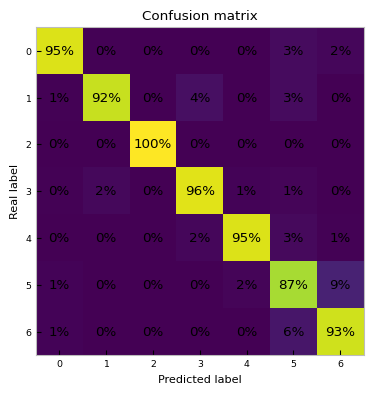

Class 0 accuracy: 94.9%
Class 1 accuracy: 91.69%
Class 2 accuracy: 100.0%
Class 3 accuracy: 95.5%
Class 4 accuracy: 94.81%
Class 5 accuracy: 87.1%
Class 6 accuracy: 92.76%
Overall: 93.82%


[94.901, 91.688, 100.0, 95.501, 94.81, 87.105, 92.763]

In [92]:
# get accuracy for test and train datasets
st = best_svc.score(df_trainX, df_trainY)
sv = best_svc.score(df_testX, df_testY)
print('Score for train dataset: ', round(100*st, 2), '%', sep='')
print('Score for test dataset: ', round(100*sv, 2), '%', sep='')

plot_confusion_matrix(df_testY, best_svc.predict(df_testX), imsize=4.4)  

#### 5.4 Random forest

<a id='54'></a>


In [93]:
from sklearn.ensemble import RandomForestClassifier


In [160]:
rfClf = RandomForestClassifier(max_depth=20, 
                               n_estimators = 250,
                               random_state=42, 
                               criterion='gini', 
                               min_samples_split=10, 
                               min_samples_leaf=1, 
                               max_features='sqrt', 
                               n_jobs=12, 
                               bootstrap=True, 
                               oob_score=True, 
                               verbose=1)
rfClf.fit(df_trainX, df_trainY)

print("Out-of-bag score:", rfClf.oob_score_)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.1s


Out-of-bag score: 0.9225359504565971


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.4s finished


[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s


Score for train dataset: 97.94%
Score for test dataset: 92.14%


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


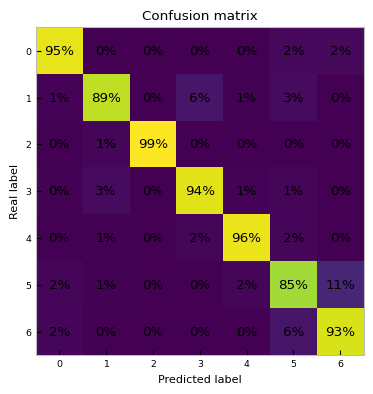

Class 0 accuracy: 94.9%
Class 1 accuracy: 89.42%
Class 2 accuracy: 98.73%
Class 3 accuracy: 94.48%
Class 4 accuracy: 95.67%
Class 5 accuracy: 85.21%
Class 6 accuracy: 92.76%
Overall: 93.02%


[94.901, 89.421, 98.726, 94.479, 95.675, 85.209, 92.763]

In [161]:
# get accuracy for test and train datasets
st = rfClf.score(df_trainX, df_trainY)
sv = rfClf.score(df_testX, df_testY)
print('Score for train dataset: ', round(100*st, 2), '%', sep='')
print('Score for test dataset: ', round(100*sv, 2), '%', sep='')

plot_confusion_matrix(df_testY, rfClf.predict(df_testX), imsize=4.4)  

#### 5.5 AdaBoost

<a id='55'></a>

In [162]:
from sklearn.ensemble import AdaBoostClassifier


In [257]:
'''
Using default DecisionTreeClassifier base classifier for ensembling, but with overrided maxDepth=15 and features count reduced
'''
estimator = DecisionTreeClassifier(criterion='gini', max_depth=15, max_features='sqrt')

adaClf = AdaBoostClassifier(estimator=estimator, n_estimators=64, random_state=42, learning_rate=1.25)
adaClf.fit(df_trainX, df_trainY)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=15,
                                                    max_features='sqrt'),
                   learning_rate=1.25, n_estimators=64, random_state=42)

Score for train dataset: 100.0%
Score for test dataset: 92.53%


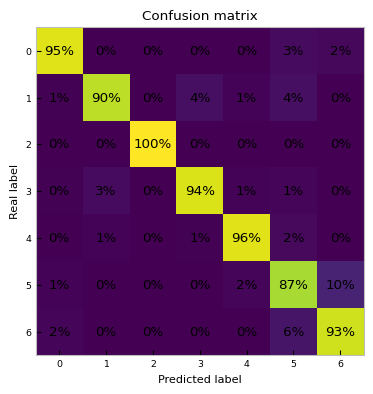

Class 0 accuracy: 95.07%
Class 1 accuracy: 89.92%
Class 2 accuracy: 100.0%
Class 3 accuracy: 94.27%
Class 4 accuracy: 95.67%
Class 5 accuracy: 86.73%
Class 6 accuracy: 92.76%
Overall: 93.49%


[95.066, 89.924, 100.0, 94.274, 95.675, 86.726, 92.763]

In [258]:
# get accuracy for test and train datasets
st = adaClf.score(df_trainX, df_trainY)
sv = adaClf.score(df_testX, df_testY)
print('Score for train dataset: ', round(100*st, 2), '%', sep='')
print('Score for test dataset: ', round(100*sv, 2), '%', sep='')

plot_confusion_matrix(df_testY, adaClf.predict(df_testX), imsize=4.4)  

#### 5.6 Feedforward NN
<a id='56'></a>
**Just try to train NN for comparing purposes**

For the NN classifier classical architecture was choosen: 16-64-128-254-128-64-32-16-7.

'selu' was used as asctivation funtion mostly, but output layer uses 'linear' due to computational reasons.

L2 provides regularization technique to prevent overfitting as well as Dropout method, apllied to the most wide layers at the beginning.

Also, by default there is Xavier weights initialization applied which hinders fading through layers.

In [24]:
import tensorflow

ModuleNotFoundError: No module named 'tensorflow'

In [592]:
print("Num GPUs Available: ", tensorflow.config.list_physical_devices('GPU'))
print("Num CPUs Available: ", tensorflow.config.list_physical_devices('CPU'))

# I don't use GPU, because it's turned out that CPU has better performance.

Num GPUs Available:  []
Num CPUs Available:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


Caclulate class weights, since they are skewed enough

In [593]:
# count values
d = df_trainY.value_counts()
# create dict
weights = dict(zip(list(d.keys()),df_train.shape[0] / (7*np.array(d))))
weights

{6: 0.548348106365834,
 5: 0.737669376693767,
 0: 0.9591261451726568,
 4: 1.0081481481481482,
 3: 1.1928133216476775,
 1: 1.4713513513513514,
 2: 3.728767123287671}

In [631]:
tensorflow.keras.backend.set_floatx('float64')
#definition
tf_perceptron = tensorflow.keras.Sequential()

alpha = 1e-5
# adding layers
# ,kernel_regularizer=tensorflow.keras.regularizers.l2(alpha)
tf_perceptron.add(tensorflow.keras.layers.Dense(16, activation="selu"))
tf_perceptron.add(tensorflow.keras.layers.Dense(64, activation="selu",kernel_regularizer=tensorflow.keras.regularizers.l2(alpha)))
tf_perceptron.add(tensorflow.keras.layers.Dropout(0.1))
tf_perceptron.add(tensorflow.keras.layers.Dense(128, activation="selu",kernel_regularizer=tensorflow.keras.regularizers.l2(alpha)))
tf_perceptron.add(tensorflow.keras.layers.Dropout(0.1))
tf_perceptron.add(tensorflow.keras.layers.Dense(256, activation="selu",kernel_regularizer=tensorflow.keras.regularizers.l2(alpha)))
tf_perceptron.add(tensorflow.keras.layers.Dropout(0.2))
tf_perceptron.add(tensorflow.keras.layers.Dense(128, activation="selu",kernel_regularizer=tensorflow.keras.regularizers.l2(alpha)))
tf_perceptron.add(tensorflow.keras.layers.Dropout(0.1))
tf_perceptron.add(tensorflow.keras.layers.Dense(64, activation="selu",kernel_regularizer=tensorflow.keras.regularizers.l2(alpha)))
tf_perceptron.add(tensorflow.keras.layers.Dense(32, activation="selu",kernel_regularizer=tensorflow.keras.regularizers.l2(alpha)))
tf_perceptron.add(tensorflow.keras.layers.Dense(7, activation="linear"))



# compilation, using Adam as decent adaptive optimizer, Crossenthropy loss.
# metrics only accuracy, because we check per lass one after each N epochs
tf_perceptron.compile(
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=["accuracy"])



# fit (just to build, learning will be later): 
# - shuffle, 
# - use weights since classes are skewed,
# - added validation data (test data), to check if overfitted
accuracy_stat = tf_perceptron.fit(df_trainX_os, df_trainY_os, 
                                  batch_size = 64,
                                  epochs = 1,
                                  shuffle = True,
                                  class_weight = weights,
                                  #steps_per_epoch = 10,
                                  verbose = 1,
                                  validation_data = (df_trainX, df_trainY),
                                  workers = 8,
                                  use_multiprocessing = True
                                  )
# describe model
tf_perceptron.summary()


272/272 [==============================] - 4s 9ms/step - loss: 0.4888 - accuracy: 0.8152 - val_loss: 0.4624 - val_accuracy: 0.8472
Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_359 (Dense)           (None, 16)                272       
                                                                 
 dense_360 (Dense)           (None, 64)                1088      
                                                                 
 dropout_66 (Dropout)        (None, 64)                0         
                                                                 
 dense_361 (Dense)           (None, 128)               8320      
                                                                 
 dropout_67 (Dropout)        (None, 128)               0         
                                                                 
 dense_362 (Dense)           (None, 256)              

#### Learning

Each k epochs, detailed scores is calculated, to control learning process. 190 epochs were the optimal

Epoch 1/20
543/543 [==============================] - 4s 8ms/step - loss: 0.1433 - accuracy: 0.9434 - val_loss: 0.1864 - val_accuracy: 0.9318
Epoch 2/20
543/543 [==============================] - 4s 8ms/step - loss: 0.1421 - accuracy: 0.9446 - val_loss: 0.1612 - val_accuracy: 0.9427
Epoch 3/20
543/543 [==============================] - 4s 8ms/step - loss: 0.1489 - accuracy: 0.9400 - val_loss: 0.2421 - val_accuracy: 0.9162
Epoch 4/20
543/543 [==============================] - 4s 8ms/step - loss: 0.1450 - accuracy: 0.9448 - val_loss: 0.2064 - val_accuracy: 0.9323
Epoch 5/20
543/543 [==============================] - 4s 8ms/step - loss: 0.1463 - accuracy: 0.9438 - val_loss: 0.2067 - val_accuracy: 0.9220
Epoch 6/20
543/543 [==============================] - 4s 8ms/step - loss: 0.1403 - accuracy: 0.9443 - val_loss: 0.1854 - val_accuracy: 0.9366
Epoch 7/20
543/543 [==============================] - 5s 9ms/step - loss: 0.1476 - accuracy: 0.9441 - val_loss: 0.1765 - val_accuracy: 0.9338
Epoch 

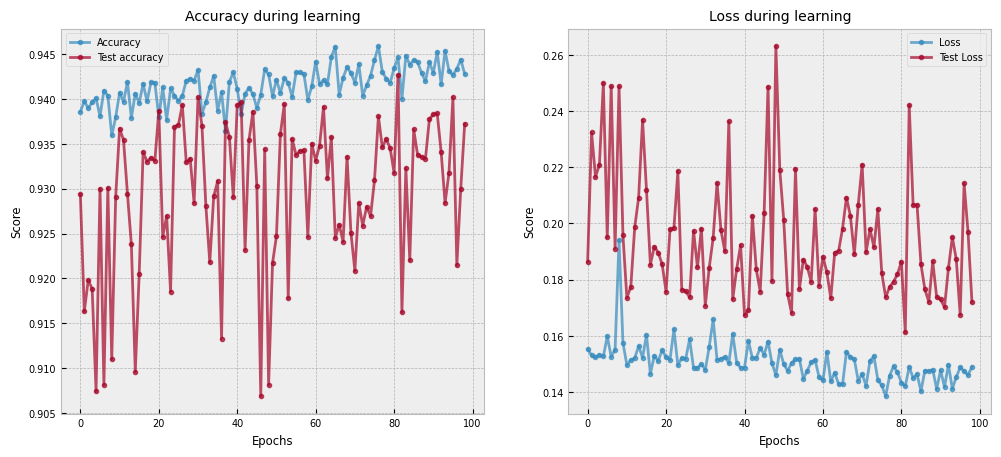

Epoch 1/20
543/543 [==============================] - 5s 10ms/step - loss: 0.1441 - accuracy: 0.9456 - val_loss: 0.1976 - val_accuracy: 0.9300
Epoch 2/20
543/543 [==============================] - 5s 9ms/step - loss: 0.1430 - accuracy: 0.9426 - val_loss: 0.1652 - val_accuracy: 0.9413
Epoch 3/20
543/543 [==============================] - 5s 9ms/step - loss: 0.1407 - accuracy: 0.9449 - val_loss: 0.1913 - val_accuracy: 0.9332
Epoch 4/20
543/543 [==============================] - 5s 9ms/step - loss: 0.1465 - accuracy: 0.9442 - val_loss: 0.1902 - val_accuracy: 0.9317
Epoch 5/20
543/543 [==============================] - 5s 9ms/step - loss: 0.1450 - accuracy: 0.9439 - val_loss: 0.1905 - val_accuracy: 0.9314
Epoch 6/20
543/543 [==============================] - 5s 9ms/step - loss: 0.1464 - accuracy: 0.9438 - val_loss: 0.2233 - val_accuracy: 0.9231
Epoch 7/20
543/543 [==============================] - 5s 9ms/step - loss: 0.1594 - accuracy: 0.9415 - val_loss: 0.1861 - val_accuracy: 0.9360
Epoch

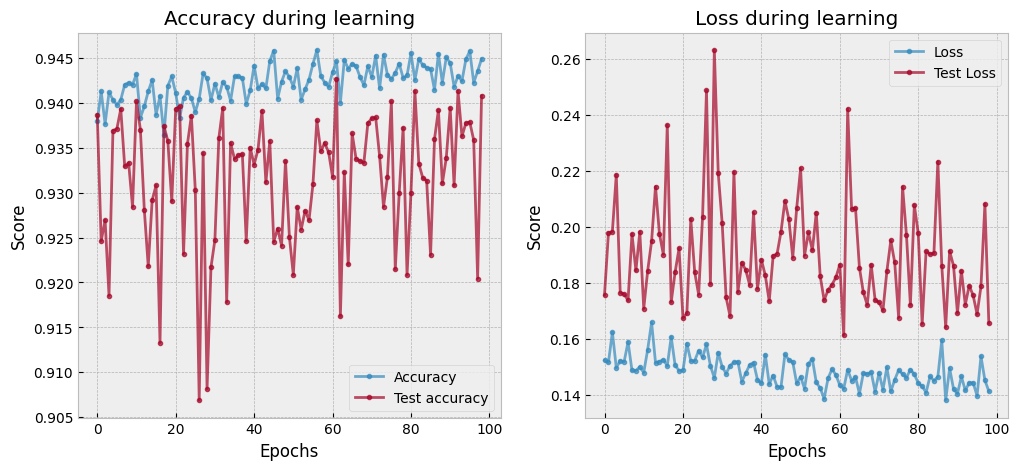

Epoch 1/20
138/543 [======>.......................] - ETA: 3s - loss: 0.1433 - accuracy: 0.9432

KeyboardInterrupt: 

In [642]:
k = 20
clf_list_weights = []
for j in range(25):
    accuracy_stat_added = tf_perceptron.fit(df_trainX_os, df_trainY_os, 
                                  batch_size = 32,
                                  epochs = k,
                                  shuffle = True,
                                  class_weight = weights,
                                  #steps_per_epoch = 10,
                                  verbose = 1,
                                  validation_data = (df_trainX, df_trainY),
                                  workers = 8,
                                  use_multiprocessing = True
                                  )        
    
    for i in ['accuracy', 'loss', 'val_accuracy', 'val_loss']:
        accuracy_stat.history[i] += accuracy_stat_added.history[i]    
    print("=========EPOCHS FINISHED-{}=========".format(k*(j+1)))
    trs = check_accuracy_tf(df_trainX, df_trainY, tf_perceptron)
    tes = check_accuracy_tf(df_testX, df_testY, tf_perceptron)
    print("Train score: ", round(100*trs, 2), '%', sep='')
    print("Test score: ", round(100*tes, 2), '%', sep='')
    per_class_accuracy(df_testY, predict_tf(df_testX, tf_perceptron))
    #plot_confusion_matrix(df_testY, predict_tf(df_testX, tf_perceptron))  
    plot_accuracy(accuracy_stat.history, False)
    clf_list_weights.append(tf_perceptron.weights.copy())
## plotting accuracy during learning
#plot_accuracy(accuracy_stat.history)

Plot statistics:

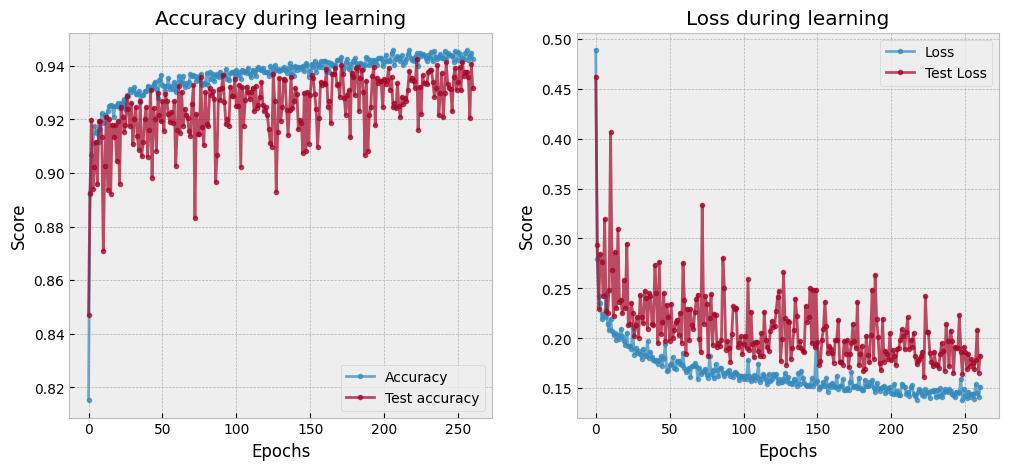

In [643]:
## plotting accuracy during learning
plot_accuracy(accuracy_stat.history, full=10)

In [644]:
trs = check_accuracy_tf(df_trainX, df_trainY, tf_perceptron)
tes = check_accuracy_tf(df_testX, df_testY, tf_perceptron)

print("Train score: ", round(100*trs, 2), '%', sep='')
print("Test score: ", round(100*tes, 2), '%', sep='')
per_class_accuracy(df_testY, predict_tf(df_testX, tf_perceptron))

128/128 [==============================] - 0s 2ms/step
Train score: 94.1%
Test score: 91.75%
128/128 [==============================] - 0s 3ms/step
Class 0 accuracy: 96.22%
Class 1 accuracy: 94.71%
Class 2 accuracy: 100.0%
Class 3 accuracy: 92.84%
Class 4 accuracy: 96.02%
Class 5 accuracy: 84.32%
Class 6 accuracy: 89.57%
Overall: 93.38%


[96.217, 94.71, 100.0, 92.843, 96.021, 84.324, 89.568]

128/128 [==============================] - 0s 2ms/step


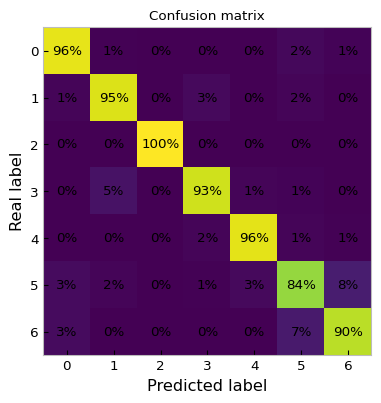

Class 0 accuracy: 96.22%
Class 1 accuracy: 94.71%
Class 2 accuracy: 100.0%
Class 3 accuracy: 92.84%
Class 4 accuracy: 96.02%
Class 5 accuracy: 84.32%
Class 6 accuracy: 89.57%
Overall: 93.38%


[96.217, 94.71, 100.0, 92.843, 96.021, 84.324, 89.568]

In [645]:
plot_confusion_matrix(df_testY, predict_tf(df_testX, tf_perceptron), imsize=4.4)  

## [[Custom functions]]

In [22]:
# plot conf matrix
def plot_confusion_matrix(Y, predicted, imsize=0, per_class_acc=True):
    # get confusion matrix
    cm = confusion_matrix(Y, predicted, normalize='true')
    # image size
    n = max(np.unique(Y).shape[0], 4)
    # if arg specified, use custom size
    if imsize > 0: n = imsize
    # create fig
    fig = plt.figure(figsize=(n,n), dpi=5*(n**2))
    plt.style.use('bmh')
    ax = fig.add_subplot(111)
    plt.rcParams.update({'font.size': 7})
    plt.ylabel('Real label')
    plt.xlabel('Predicted label')
    plt.title("Confusion matrix")
    plt.grid(False)
    #disp = ConfusionMatrixDisplay(cm)
    plt.imshow(cm)
    accuracy = []
    # print percentage
    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, str(round(100*cm[i, j])) + '%',
                           ha="center", va="center", fontsize='x-large', color="k")
    plt.show()
    acc = []
    # print accuracy
    if per_class_acc:
        for i in range(cm.shape[0]):
            acc.append(round(100*cm[i,i], 3))
            print("Class {} accuracy: {}%".format(i, round(100*cm[i,i], 2)))  
        print("Overall: {}%".format(round(np.mean(acc), 2)))
        return acc
    
# returna per class accuracy
def per_class_accuracy(Y, predicted):
    cm = confusion_matrix(Y, predicted, normalize='true')
    acc = []
    for i in range(cm.shape[0]):
        acc.append(round(100*cm[i,i], 3))
        print("Class {} accuracy: {}%".format(i, round(100*cm[i,i], 2)))  
    print("Overall: {}%".format(round(np.mean(acc), 2)))
    return acc    
    
# plot history of learning    
def plot_accuracy(history, full=True):
    acc, loss = history['accuracy'], history['loss']
    fig, ax = plt.subplots(1, 2, figsize=(12, 5), dpi=100)
    plt.style.use('bmh')
    if not full: 
        acc = acc[-full:-1]
        loss = loss[-full:-1]
    ax[0].plot(acc,'.-'  , alpha=0.7,label="Accuracy")
    ax[1].plot(loss,'.-'  , alpha=0.7, label="Loss")
    try:
        vacc, vloss = history['val_accuracy'], history['val_loss']
        if not full: 
            vacc = vacc[-full:-1]
            vloss = vloss[-full:-1]
        ax[0].plot(vacc,'.-'  , alpha=0.7,label="Test accuracy")
        ax[1].plot(vloss,'.-'  , alpha=0.7, label="Test Loss")        
    except:
        print("No validation data.")
    # setting plot design
    ax[0].set_ylabel('Score')
    ax[0].set_xlabel('Epochs')
    ax[0].legend()
    ax[0].set_title("Accuracy during learning")
    ax[1].set_ylabel('Score')
    ax[1].set_xlabel('Epochs')
    ax[1].legend()
    ax[1].set_title("Loss during learning")
    plt.rcParams.update({'font.size': 10})
    plt.show()  
    
# predict with linear output
def predict_tf(X, classifier):
    return np.argmax(classifier.predict(X), axis=1)

# check accuracy
def check_accuracy_tf(x_val, y_val, model):
    acc = np.equal(np.argmax(model.predict(x_val), axis=1), y_val)
    return np.sum(acc) / len(y_val)

### 6.0 Summarizing results
<a id='6'></a>


1. All simple models have obtained almost the same results. Slight difference could be observed only in per class occuracy. Since NN has more parameters to adjust, a lot of ones were tested, but no increase in overall accuracy was noticed; only skewness in per class accuracy was obtained. Therefore, it seems that some accuracy limit was reached, probably due to relatively low sample size.

2. More complex and powerfull algorithms as like SVC or ensemble-based RF, Boosting classifiers provided the best score, 100% in some classes. 

3. However, results of SVC seems to be the best, it has hightest avg test score and has better accuracy at the most difficult '5' cass.

# 1. Зниження розмірності і візуалізація даних

Застосуйте методи зниження розмірності sklearn.decomposition.PCA і sklearn.manifold.TSNE для візуалізації даних, з якими ви працювали в лабораторній № 1 (знижуючи розмірність до двох). Візуалізуйте результат.

In [25]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

<Axes: xlabel='t1', ylabel='t2'>

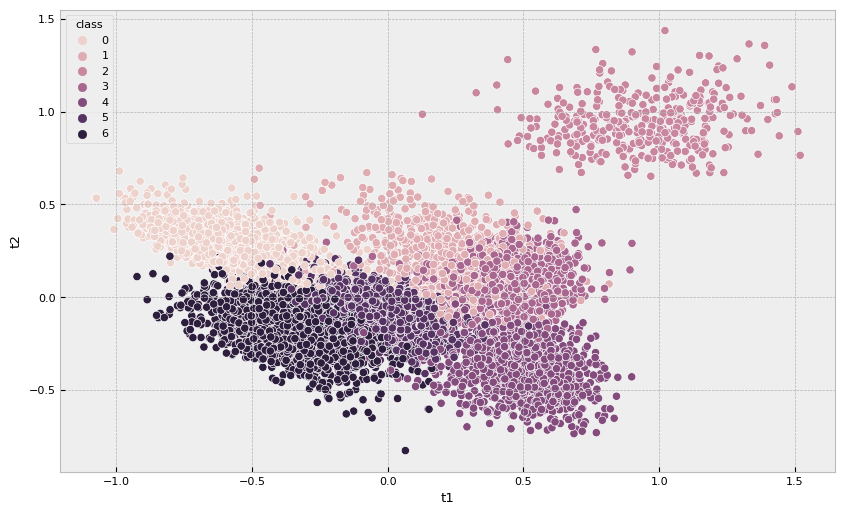

In [33]:
pca = PCA(n_components=2)
out = pca.fit_transform(df_trainX)

out_df = pd.DataFrame({'t1': out[:,0], 't2': out[:,1], 'class': df_trainY})

fig = plt.figure(figsize=(10,6), dpi=100)
plt.style.use('bmh')
ax = fig.add_subplot(111)
sns.scatterplot(x='t1', y='t2', hue='class', data=out_df, ax=ax)



<Axes: xlabel='t1', ylabel='t2'>

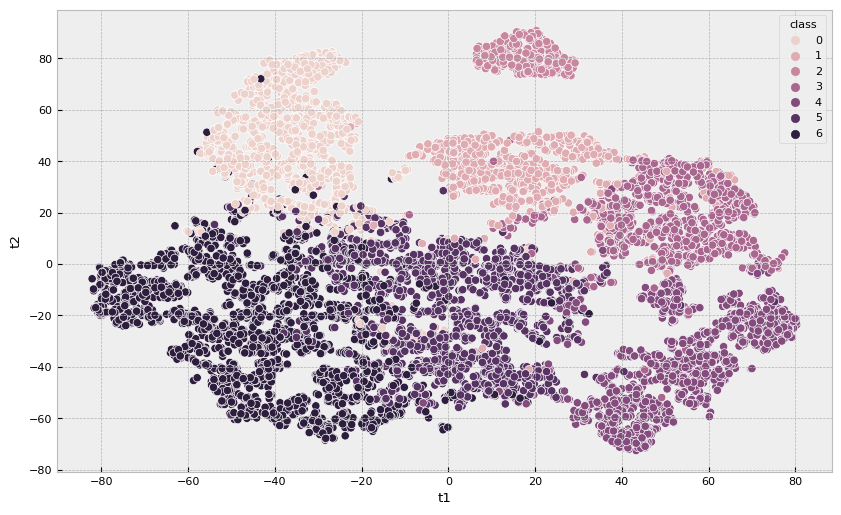

In [34]:
tsne = TSNE(n_components=2)
out = tsne.fit_transform(df_trainX)

out_df = pd.DataFrame({'t1': out[:,0], 't2': out[:,1], 'class': df_trainY})


fig = plt.figure(figsize=(10,6), dpi=100)
plt.style.use('bmh')
ax = fig.add_subplot(111)
sns.scatterplot(x='t1', y='t2', hue='class', data=out_df, ax=ax)
ax.set_aspect('equal')


# Кластерний аналіз
1) За допомогою алгоритму k-means зробіть квантування зображення (видалення візуально надлишкової інформації) з глибиною 64, 32, 16 та 8 рівнів для будь-якого обраного самостійно зображення.

In [138]:
from PIL import Image
from sklearn.cluster import KMeans


(4032, 3024, 3)


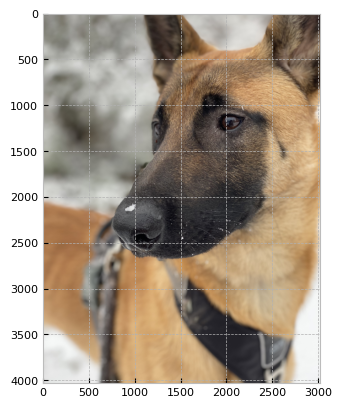

In [40]:
# loading image

image_path = "malinois.jpg"
image = Image.open(image_path)

image_array = np.array(image)

print(image_array.shape)

plt.imshow(image_array)

(5000, 3)


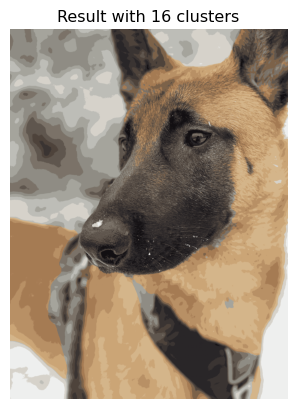

In [55]:
# normalize [0,255] --> [0,1]

img_arr = image_array / 255

# flatten (w,h,c) --> (w*h, c)
w, h, c = img_arr.shape
flattened_img = np.reshape(img_arr, (w*h, c))

# sample random subset of data
train_sample = flattened_img[np.random.randint(0, w*h, 5000), :]
print(train_sample.shape)

# fit KMeans model
kmeans = KMeans(n_clusters=16, n_init="auto", random_state=42)
kmeans.fit(train_sample)

clustered = kmeans.predict(flattened_img)
mapped = kmeans.cluster_centers_[clustered] # map colors as cluster centers
out_img = np.reshape(mapped, (w,h,c))

plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Result with 16 clusters")
plt.imshow(out_img)

In [56]:
def pipeline(input_img, clusters: int, train_sample_size=6000):
    img_arr = image_array / 255
    w, h, c = img_arr.shape
    flattened_img = np.reshape(img_arr, (w*h, c))

    train_sample = flattened_img[np.random.randint(0, w*h, train_sample_size), :]

    kmeans = KMeans(n_clusters=clusters, n_init="auto", random_state=42)
    kmeans.fit(train_sample)

    clustered = kmeans.predict(flattened_img)
    mapping = kmeans.cluster_centers_[clustered] 
    out_img = np.reshape(mapping, (w,h,c))

    plt.figure(1)
    plt.clf()
    plt.axis("off")
    plt.title(f"Result with {clusters} clusters, sample_size={train_sample_size}")
    plt.imshow(out_img)

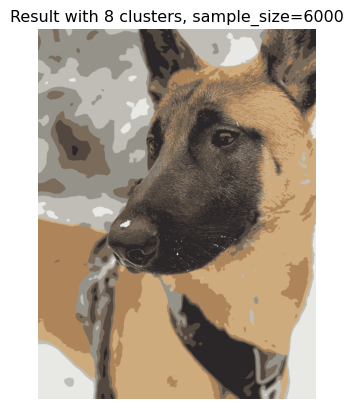

In [58]:
pipeline(image_array, 8)

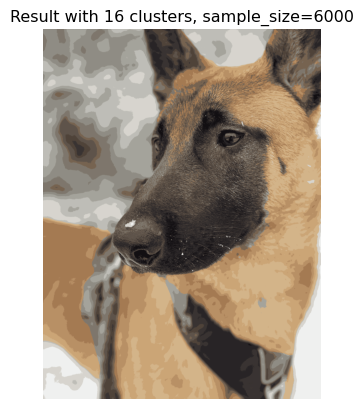

In [59]:
pipeline(image_array, 16)

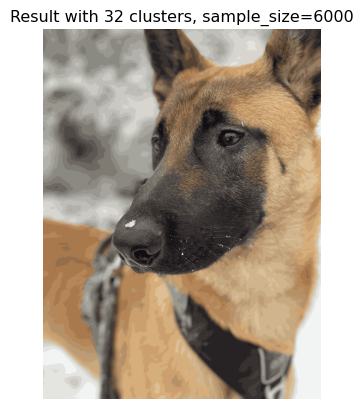

In [60]:
pipeline(image_array, 32)

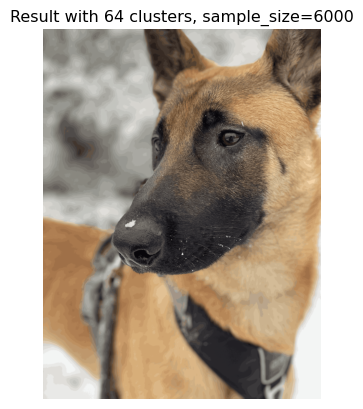

In [61]:
pipeline(image_array, 64)

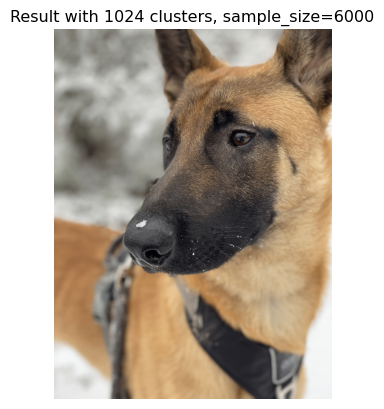

In [62]:
pipeline(image_array, 1024)

# 3. Обробка та класифікація текстових даних
Завантажте набір текстових даних (з мітками класів). Проведіть передобробку даних (видаліть стоп-слова, пунктуацію), за допомогою wordcloud зробіть візуалізацію найбільш поширених слів або n-gram у кожному класі. Векторизуйте тексти (наприклад за допомогою sklearn.feature_extraction.text.TfidfVectorizer). Проведіть класифікацію текстових даних, зробіть оцінку якості. 

Dataset downloaded form kaggle. It contains reviews written by customers and some additional infromation about client. However, only reviews itself and rating as a class will be used next.

https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews

In [2]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\1\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
# loading
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
target = 'Review Text'
label = "Rating"
df = df.astype('string').dropna() # convert to string, drop missing vals
df = df.loc[:, [target,label]] # cut dataset, since we interested only in 2 cols
df.head() # show first 5 rows


Review Text Rating
2  I had such high hopes for this dress and reall...      3
3  I love, love, love this jumpsuit. it's fun, fl...      5
4  This shirt is very flattering to all due to th...      5
5  I love tracy reese dresses, but this one is no...      2
6  I aded this in my basket at hte last mintue to...      5

<AxesSubplot:xlabel='Review Text', ylabel='Count'>

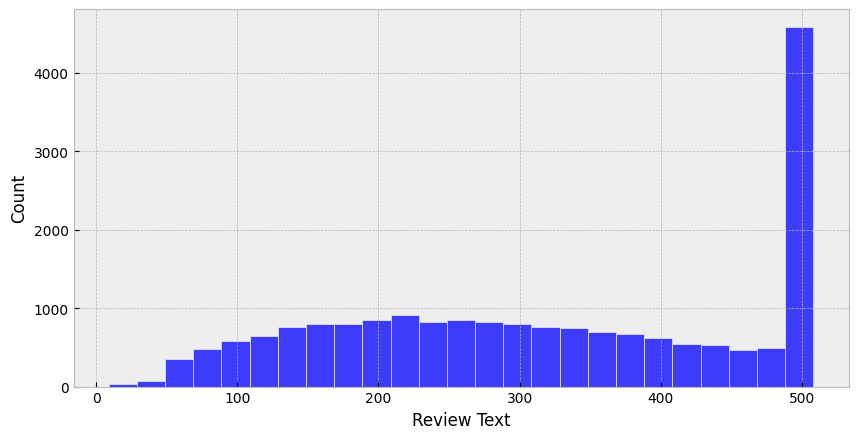

In [4]:
lens = df[target].map(lambda x: len(x)) # get lens of rows

# plot distribution of texts length
fig, ax = plt.subplots(1,1, figsize=(10,5), dpi=100)
sns.histplot(lens, ax=ax)


In [5]:
'''
Trying to use sophisticated tokenization technique
'''


# tag mapper for lemmatizer
def tag_mapper(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return 'n'
    
    
# 1. tokenize text by words
# 2. delete punctuation chars
# 3. delete stop words since they barely influence on the sence.
# 4. tag words 
# 5. map tag for further using in lemmatization algorithm
# 6. and then lemmatize words using tag

def map_token(s):
    s = word_tokenize(s.lower())
    s = [w for w in s if w.isalpha()]
    s = [w for w in s if w not in stopwords.words('english')]
    s = [(w[0], tag_mapper(w[1])) for w in nltk.pos_tag(s)]
    s = [WordNetLemmatizer().lemmatize(*w) for w in s]
    return s

In [6]:
data = df[target].map(map_token)

In [7]:
data

2        [high, hope, dress, really, wanted, work, init...
3        [love, love, love, jumpsuit, fun, flirty, fabu...
4        [shirt, flatter, due, adjustable, front, tie, ...
5        [love, tracy, reese, dress, one, petite, foot,...
6        [aded, basket, hte, last, mintue, see, would, ...
                               ...                        
23481    [happy, snag, dress, great, price, easy, slip,...
23482    [reminds, maternity, clothes, soft, stretchy, ...
23483    [fit, well, top, see, never, would, work, glad...
23484    [buy, dress, wed, summer, cute, unfortunately,...
23485    [dress, lovely, platinum, feminine, fit, perfe...
Name: Review Text, Length: 19662, dtype: object

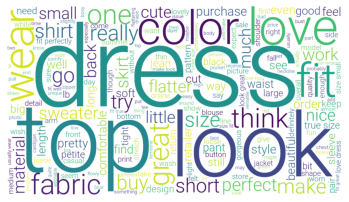

In [8]:
text = " ".join([w for a in data.to_list()[0:5000] for w in a])

wordcloud = WordCloud(width=1280, height=720, background_color="white", font_path="Roboto-Light.ttf").generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
vectorizer = CountVectorizer()

# yes, we convert tokenized array back to 'corpus' - easiest solution to feed vectorizer
XM = vectorizer.fit_transform([" ".join(row) for row in data.to_list()])

# vectors - training data
xvec = XM.toarray()

In [121]:
xvec.shape, df[label].shape

((19662, 10680), (19662,))

In [123]:
# splitting to train/test data
SPLIT = 16712  # 85% of dataset

x,y = xvec[0:SPLIT, :], df[label].to_list()[0:SPLIT]
xv,yv = xvec[SPLIT:, :], df[label].to_list()[SPLIT:]

x.shape, len(y), xv.shape, len(yv)

((16712, 10680), 16712, (2950, 10680), 2950)

In [128]:
# using RF classifier 

rfClf = RandomForestClassifier(max_depth=40, 
                               random_state=42, 
                               criterion='gini', 
                               min_samples_split=2, 
                               min_samples_leaf=1, 
                               max_features=0.6, 
                               n_jobs=12, 
                               bootstrap=True, 
                               oob_score=True, 
                                n_estimators = 500,
                               verbose=1)
rfClf.fit(x, y)

print("Out-of-bag score:", rfClf.oob_score_)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:   28.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:  2.9min
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:  6.9min
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:  8.1min finished


Out-of-bag score: 0.5942436572522738


In [130]:
p = rfClf.predict(xv)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.4s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.5s finished


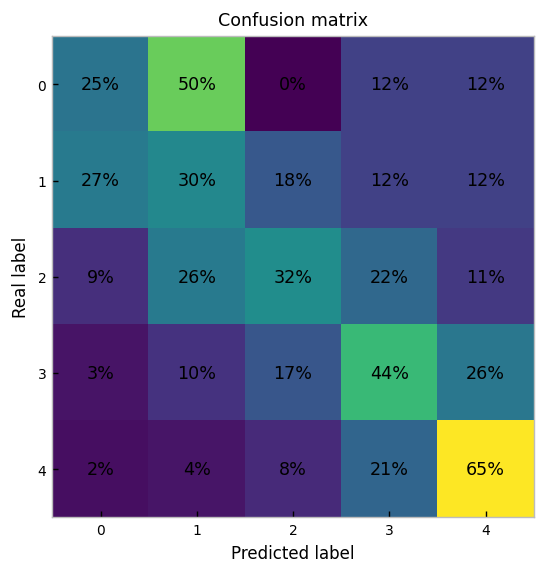

Class 0 accuracy: 25.0%
Class 1 accuracy: 30.36%
Class 2 accuracy: 31.86%
Class 3 accuracy: 43.91%
Class 4 accuracy: 64.87%
Overall: 39.2%


[25.0, 30.357, 31.864, 43.911, 64.871]

In [131]:
plot_confusion_matrix(p, yv)